In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")
pd.options.display.min_rows = 100

In [2]:
train = pd.read_csv('C:\\Users\\Willy\\Desktop\\Ale\\HENRY\\Hackaton\\Hackathon-main\\Housing Dreams\\house_train_raw.csv')
test =  pd.read_csv('C:\\Users\\Willy\\Desktop\\Ale\\HENRY\\Hackaton\\Hackathon-main\\Housing Dreams\\houses_test_raw.csv')
train.columns
train.drop(['Id'],axis =1,inplace=True)


In [3]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#               Separo por tipos de variables


Se separan las variables acorde a su naturaleza, para darles el tratamiento necesario para el procesamiento en el modelo

### Numericas y categóricas

In [5]:
categorical_features = train.select_dtypes(include=['object']).columns
numerical_features = train.select_dtypes(exclude=['object']).columns
numerical_features=numerical_features.drop('SalePrice')

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))



Numerical features : 36
Categorical features : 43


Se agrega la columna __SalePrice_log__, ya que transformada _SalePrice_ a _log_ sigue una distribución normal

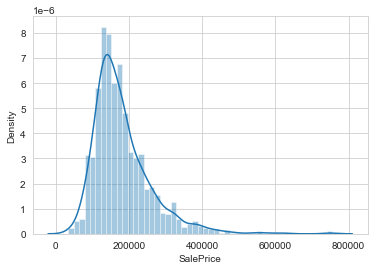

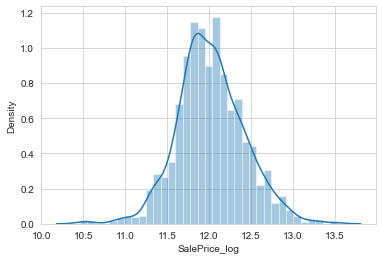

In [6]:
x = train.SalePrice
sns.set_style("whitegrid")
sns.distplot(x)
plt.show()

train["SalePrice_log"] = np.log(train.SalePrice)
x = train.SalePrice_log
sns.distplot(x)
plt.show()

# Valores faltantes

Se observan los valores faltantes para los 2 tipos de variables, numericas y categóricas

<AxesSubplot:>

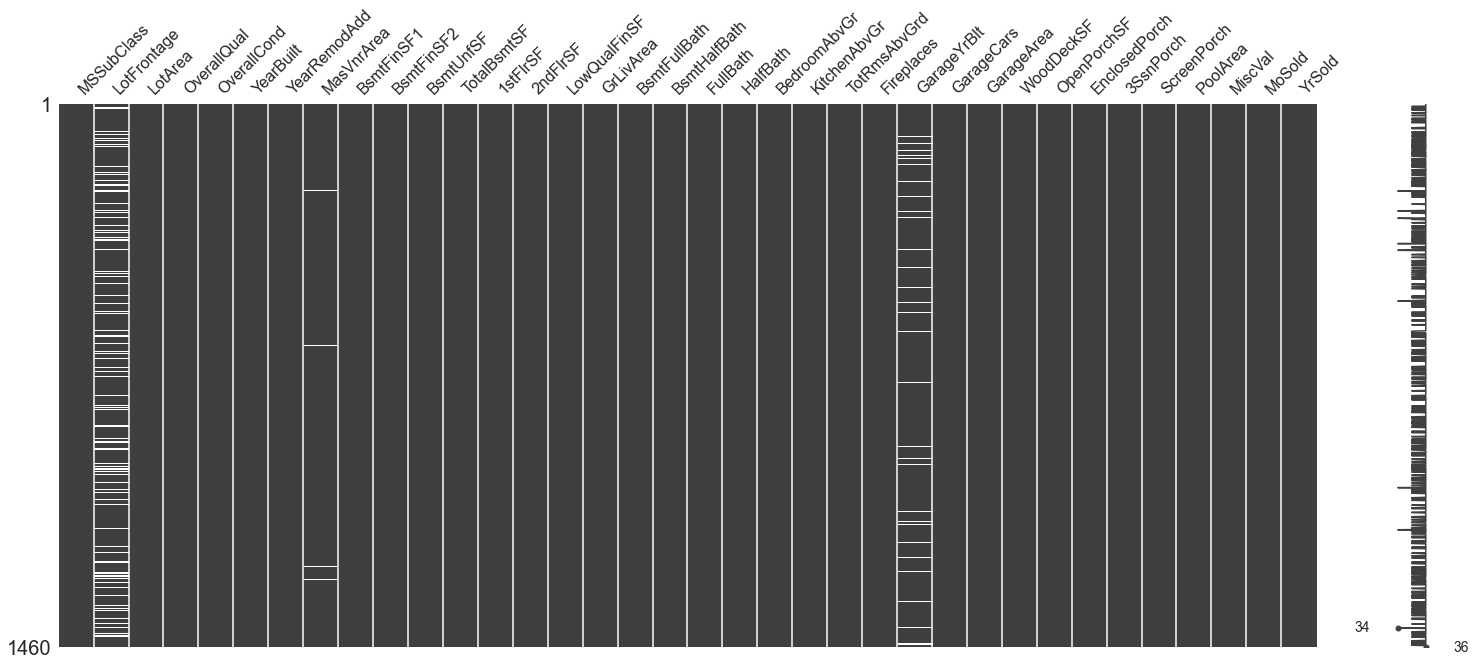

In [7]:
msno.matrix(train[numerical_features])

<AxesSubplot:>

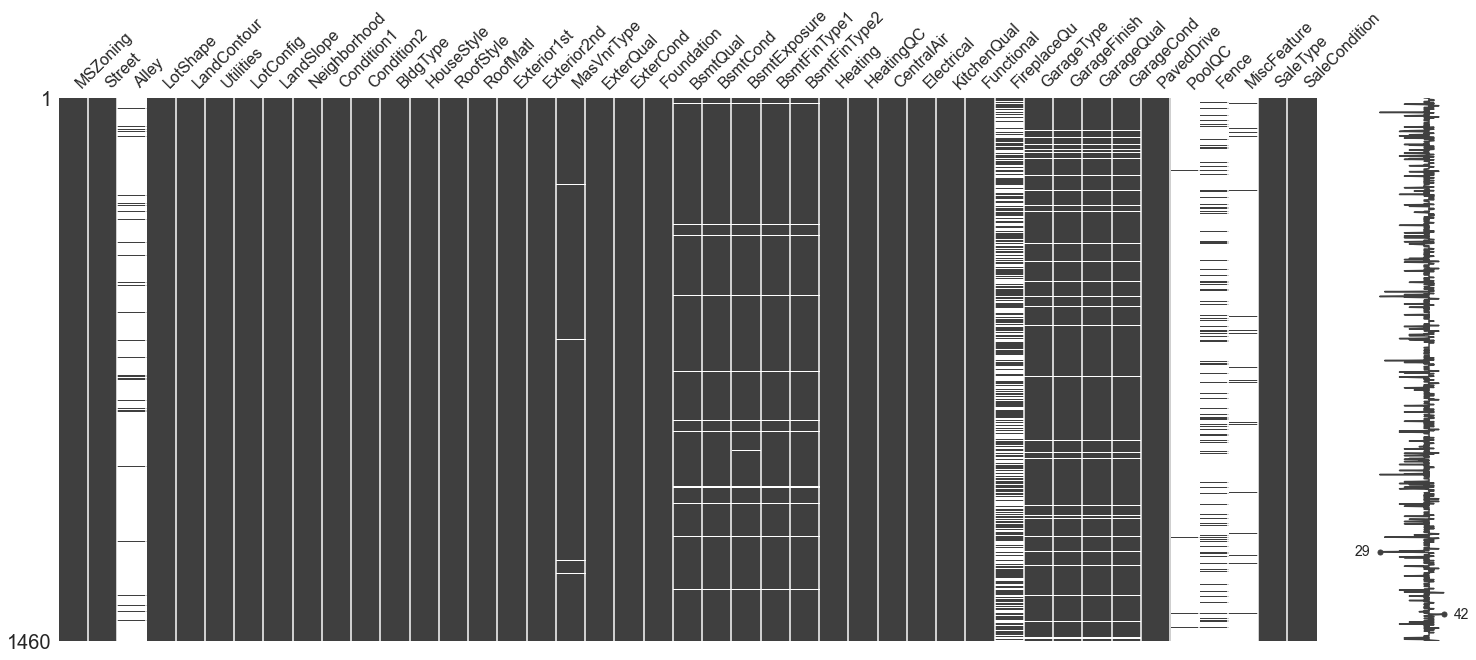

In [8]:
msno.matrix(train[categorical_features])

Se observan los valores faltantes con los siguientes metodos

In [9]:
train.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageQual         81
GarageFinish       81
GarageCond         81
GarageType         81
BsmtFinType2       38
BsmtExposure       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrType          8
MasVnrArea          8
Electrical          1
MSSubClass          0
Fireplaces          0
TotRmsAbvGrd        0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
Functional          0
GarageArea          0
GarageCars          0
                 ... 
BldgType            0
Condition2          0
Condition1          0
LandSlope           0
YearRemodAdd        0
LotConfig           0
Utilities           0
LandContour         0
LotShape            0
Street              0
LotArea             0
YearBuilt           0
RoofStyle           0
LowQualFinSF        0
BsmtUnfSF 

Se rellenan los valores faltantes de la siguiente manera

In [10]:
values = {
    "PoolQC": "No Pool",
    "MiscFeature": "No Feature",
    "Alley": "No alley access",
    "Fence": "No Fence",
    "FireplaceQu": "No Fireplace",
    "GarageCond": "No Garage",
    "GarageType": "No Garage",
    "GarageArea": 0,
    "GarageYrBlt": "None built",
    "GarageFinish": "No Garage",
    "GarageQual": "No Garage",
    "BsmtExposure": "No Basement",
    "BsmtFinType2": "Not Applicable",
    "BsmtFinType1": "Not Applicable",
    "BsmtCond": "No Basement",
    "BsmtQual": "No Basement",
    "MasVnrArea": 0,
    "MasVnrType": "No Veneer",
    "LotFrontage": 0,
    "Electrical": 'Normal'
}

train.fillna(value=values, inplace=True)
test.fillna(value=values, inplace=True)

train.isna().sum().sum()

0

## Faltantes en el conjunto test


In [11]:
test.isna().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      1
TotRmsAbvGrd     0
Functional       2
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       1
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    

In [12]:
faltantes_test = ['MSZoning','BsmtFullBath','BsmtHalfBath','Functional','Utilities',
'Exterior2nd','BsmtUnfSF','BsmtFinSF1','GarageCars','BsmtFinSF2','TotalBsmtSF',
'Exterior1st','SaleType','KitchenQual' ]

values_test1 = ['BsmtFullBath', 'BsmtHalfBath','BsmtUnfSF','BsmtFinSF1','GarageCars','BsmtFinSF2','TotalBsmtSF' ]  
for i in values_test1:
    test[i].fillna(0, inplace=True)

values_test2 = ['MSZoning','Functional','Utilities','Exterior1st','Exterior2nd','SaleType','KitchenQual'] # Estos van a ser reemplazados por la moda
for j in values_test2:
    test[j].fillna(test[j].mode()[0], inplace=True)
    

test.isna().sum().sum()

0

In [13]:
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [14]:
## Se generan los df numerico y categorico
train_cat = train[categorical_features]
train_num = train[numerical_features]

## ---------------------------------------

### Se transforman a logaritmicas la siguientes columnas para que tengan distribución normal

In [15]:
numerical_features = numerical_features.tolist()

In [16]:
train_num['GrLivArea_Log'] = np.log(train_num['GrLivArea'])
test['GrLivArea_Log'] = np.log(test['GrLivArea'])
numerical_features.append('GrLivArea_Log')

test = test.drop('GrLivArea', axis=1)
train_num = train_num.drop('GrLivArea', axis=1)
numerical_features.remove('GrLivArea')


C:\Users\Willy\AppData\Local\Temp\ipykernel_389476\4086165705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num['GrLivArea_Log'] = np.log(train_num['GrLivArea'])


## Se grafica la correlacion entre las variables continuas y __SalePrice__

#### Mapa de correlación de todas las variables

In [17]:
train_num['SalePrice_log'] = train['SalePrice_log']

In [18]:
#Estas son las columnas numericas correlacionadas en orden de correlación, se almacenan solo las primeras 15
round(train_num.corr()['SalePrice_log'].sort_values(ascending=False),3).index

Index(['SalePrice_log', 'OverallQual', 'GrLivArea_Log', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt',
       'YearRemodAdd', 'TotRmsAbvGrd', 'Fireplaces', 'MasVnrArea',
       'BsmtFinSF1', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'LotFrontage',
       'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2',
       'BsmtHalfBath', 'MiscVal', 'OverallCond', 'YrSold', 'LowQualFinSF',
       'MSSubClass', 'KitchenAbvGr', 'EnclosedPorch'],
      dtype='object')

Se puede observar que de las que tienen correlación negativa, ninguna tiene un valor superior a __-0.15__

In [26]:
round(train_num.corr()['SalePrice_log'].sort_values(ascending=True),3)

EnclosedPorch   -0.149
KitchenAbvGr    -0.148
MSSubClass      -0.074
LowQualFinSF    -0.038
YrSold          -0.037
OverallCond     -0.037
MiscVal         -0.020
BsmtHalfBath    -0.005
BsmtFinSF2       0.005
3SsnPorch        0.055
MoSold           0.057
PoolArea         0.070
ScreenPorch      0.121
LotFrontage      0.179
BedroomAbvGr     0.209
BsmtUnfSF        0.222
BsmtFullBath     0.236
LotArea          0.257
HalfBath         0.314
2ndFlrSF         0.319
OpenPorchSF      0.321
WoodDeckSF       0.334
BsmtFinSF1       0.372
MasVnrArea       0.427
Fireplaces       0.489
TotRmsAbvGrd     0.534
YearRemodAdd     0.566
YearBuilt        0.587
FullBath         0.595
1stFlrSF         0.597
TotalBsmtSF      0.612
GarageArea       0.651
GarageCars       0.681
GrLivArea_Log    0.730
OverallQual      0.817
SalePrice_log    1.000
Name: SalePrice_log, dtype: float64

Nos quedamos entonces con __num_features__, que serán las variables más correlacionadas

In [47]:
num_features = ['SalePrice_log', 'OverallQual', 'GrLivArea_Log', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt',
       'YearRemodAdd', 'TotRmsAbvGrd', 'Fireplaces', 'MasVnrArea']

### Se grafica la correlacion entre las variables numericas y SalePrice_log

In [20]:
train_num[num_features].corr()

,SalePrice_log,OverallQual,GrLivArea_Log,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,Fireplaces,MasVnrArea
SalePrice_log,1.000000,0.817184,0.730255,0.680625,0.650888,0.612134,0.596981,0.594771,0.586570,0.565608,0.534422,0.489449,0.426775
OverallQual,0.817184,1.000000,0.614210,0.600671,0.562022,0.537808,0.476224,0.550600,0.572323,0.550684,0.427452,0.396765,0.407252
GrLivArea_Log,0.730255,0.614210,1.000000,0.496132,0.476160,0.435852,0.551428,0.653160,0.235518,0.311464,0.825498,0.468915,0.360880
GarageCars,0.680625,0.600671,0.496132,1.000000,0.882475,0.434585,0.439317,0.469672,0.537850,0.420622,0.362289,0.300789,0.361945
GarageArea,0.650888,0.562022,0.476160,0.882475,1.000000,0.486665,0.489782,0.405656,0.478954,0.371600,0.337822,0.269141,0.370884
TotalBsmtSF,0.612134,0.537808,0.435852,0.434585,0.486665,1.000000,0.819530,0.323722,0.391452,0.291066,0.285573,0.339519,0.360067
1stFlrSF,0.596981,0.476224,0.551428,0.439317,0.489782,0.819530,1.000000,0.380637,0.281986,0.240379,0.409516,0.410531,0.339850
FullBath,0.594771,0.550600,0.653160,0.469672,0.405656,0.323722,0.380637,1.000000,0.468271,0.439046,0.554784,0.243671,0.272999
YearBuilt,0.586570,0.572323,0.235518,0.537850,0.478954,0.391452,0.281986,0.468271,1.000000,0.592855,0.095589,0.147716,0.311600
YearRemodAdd,0.565608,0.550684,0.311464,0.420622,0.371600,0.291066,0.240379,0.439046,0.592855,1.000000,0.191740,0.112581,0.176529


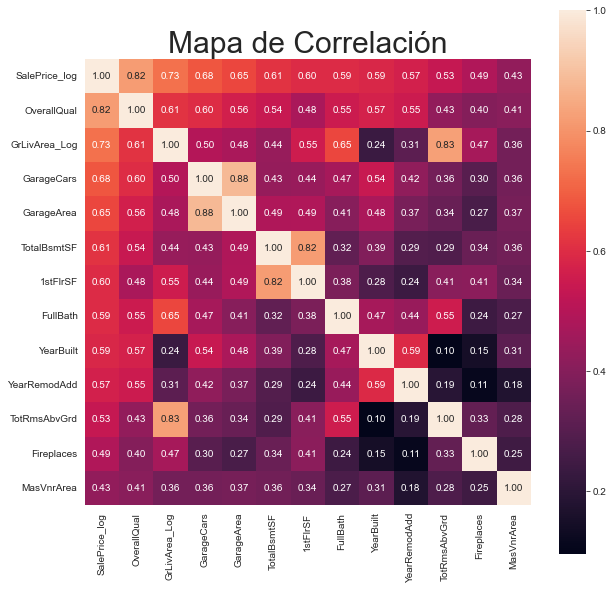

In [48]:

train_num = train_num[num_features]
corr = train_num.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= num_features, 
           yticklabels= num_features,)
plt.xticks(rotation = 90)
plt.title('Mapa de Correlación', fontsize=30)
# plt.yticks(rotation = 45)
plt.show()

# ------------------------------------------------

## Get_dummies para df categórico.

In [22]:
# Se imprimen todos los valores unicos de las variables categoricas
for col in categorical_features:
    print(col , ':', len(train[col].unique()), train[col].unique())

train_cat = pd.get_dummies(train_cat)
train_cat.shape

MSZoning : 5 ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : 2 ['Pave' 'Grvl']
Alley : 3 ['No alley access' 'Grvl' 'Pave']
LotShape : 4 ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : 4 ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : 2 ['AllPub' 'NoSeWa']
LotConfig : 5 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : 3 ['Gtl' 'Mod' 'Sev']
Neighborhood : 25 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : 9 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : 8 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : 5 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : 8 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : 6 ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : 8 ['CompShg' 'WdShngl' 'Metal' 'WdSha

(1460, 268)

In [23]:
train_cat.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No alley access,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0



## ------------------------

# Modeling

## Splitting del dataset train

Primero concateno en un solo df la parte numerica y la parte categórica

In [49]:
train  = pd.concat([train_num, train_cat], axis=1)
train.shape

(1460, 281)

Nos quedamos con las variables más correlacionadas

In [85]:
[train.corr()['SalePrice_log'].sort_values(ascending=False).loc[train.corr()['SalePrice_log']>=0.1].index]
train = train[more_correlated]

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error 

In [77]:
#split the data to train the model 
y = train['SalePrice_log']
X = train.drop('SalePrice_log', axis=1)
columns = X.columns
X = X.values

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns= columns)


# se separan en el conjunto test y train los datos previamente preparados en el df train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 0)

## Regresión Lineal

Para la regresión lineal no realizaremos validación cruzada

In [83]:
Linear_r = LinearRegression().fit(X_train, y_train)
y_pred = Linear_r.predict(X_test)
y_pred = y_pred.tolist()

print('MSLE : ', round(np.sqrt(mean_squared_log_error(y_test, y_pred, squared=False)),2))

MSLE :  0.11


[Index(['SalePrice_log', 'OverallQual', 'GrLivArea_Log', 'GarageCars',
        'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt',
        'YearRemodAdd', 'TotRmsAbvGrd', 'Foundation_PConc', 'ExterQual_Gd',
        'Fireplaces', 'HeatingQC_Ex', 'BsmtQual_Ex', 'BsmtFinType1_GLQ',
        'MasVnrArea', 'GarageFinish_Fin', 'GarageType_Attchd', 'KitchenQual_Ex',
        'KitchenQual_Gd', 'GarageCond_TA', 'ExterQual_Ex',
        'Neighborhood_NridgHt', 'CentralAir_Y', 'FireplaceQu_Gd',
        'Exterior2nd_VinylSd', 'Exterior1st_VinylSd', 'BsmtQual_Gd',
        'GarageQual_TA', 'SaleType_New', 'SaleCondition_Partial',
        'MasVnrType_Stone', 'Electrical_SBrkr', 'PavedDrive_Y', 'MSZoning_RL',
        'Neighborhood_NoRidge', 'BsmtExposure_Gd', 'HouseStyle_2Story',
        'LotShape_IR1', 'GarageFinish_RFn', 'MasVnrType_BrkFace',
        'GarageType_BuiltIn', 'FireplaceQu_TA', 'FireplaceQu_Ex',
        'RoofStyle_Hip', 'Neighborhood_StoneBr', 'Fence_No Fence',
        'Neighb

In [76]:
more_correlated =['SalePrice_log', 'OverallQual', 'GrLivArea_Log', 'GarageCars',
        'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt',
        'YearRemodAdd', 'TotRmsAbvGrd', 'Foundation_PConc', 'ExterQual_Gd',
        'Fireplaces', 'HeatingQC_Ex', 'BsmtQual_Ex', 'BsmtFinType1_GLQ',
        'MasVnrArea', 'GarageFinish_Fin', 'GarageType_Attchd', 'KitchenQual_Ex',
        'KitchenQual_Gd', 'GarageCond_TA', 'ExterQual_Ex',
        'Neighborhood_NridgHt', 'CentralAir_Y', 'FireplaceQu_Gd',
        'Exterior2nd_VinylSd', 'Exterior1st_VinylSd', 'BsmtQual_Gd',
        'GarageQual_TA', 'SaleType_New', 'SaleCondition_Partial',
        'MasVnrType_Stone', 'Electrical_SBrkr', 'PavedDrive_Y', 'MSZoning_RL',
        'Neighborhood_NoRidge', 'BsmtExposure_Gd', 'HouseStyle_2Story',
        'LotShape_IR1', 'GarageFinish_RFn', 'MasVnrType_BrkFace',
        'GarageType_BuiltIn', 'FireplaceQu_TA', 'FireplaceQu_Ex',
        'RoofStyle_Hip', 'Neighborhood_StoneBr', 'Fence_No Fence',
        'Neighborhood_Somerst', 'LotConfig_CulDSac', 'BsmtExposure_Av',
        'Neighborhood_Timber', 'BsmtCond_TA', 'Heating_GasA', 'Functional_Typ',
        'BldgType_1Fam', 'Alley_No alley access', 'ExterCond_TA',
        'LotShape_IR2', 'BsmtFinType2_Unf', 'MSZoning_FV', 'RoofMatl_WdShngl',
        'Condition1_Norm', 'Neighborhood_CollgCr', 'LandContour_HLS',
        'BsmtCond_Gd']

Se imprimen los valores de MSLE para los valores de correlación siguientes

In [ ]:
rango = [0.01,0.05,0.1,0.2,0.5,0.75]
for i in rango:
    print('MSLE: ', round(mean_squared_log_error(y_test, )))

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_train_ml_sc = sc.fit_transform(df_train_ml)
df_test_ml_sc = sc.transform(df_test_ml)

In [ ]:
df_train_ml_sc = pd.DataFrame(df_train_ml_sc)
df_train_ml_sc.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,0.651479,0.529260,0.311725,-0.459303,0.789741,1.050994,0.878668,0.912210,-0.951226,0.514104,-0.133231
1,-0.071836,-0.381846,0.311725,0.466465,0.789741,0.156734,-0.429577,-0.318683,0.600495,-0.570750,0.113442


In [ ]:
X.head(2)

,OverallQual,GrLivArea_Log,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,Fireplaces,MasVnrArea,LotArea_Log
0,7,7.444249,2,856,2,2003,2003,8,0,196.0,9.041922
1,6,7.140453,2,1262,2,1976,1976,6,1,0.0,9.169518


In [ ]:
X_test.head(2)

,OverallQual,GrLivArea_Log,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,Fireplaces,MasVnrArea,LotArea_Log
0,5,6.797940,1.0,882.0,1,1961,1961,5,0,0.0,9.360655
1,6,7.192182,1.0,1329.0,1,1958,1958,6,0,108.0,9.565704


In [ ]:
X_sc.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,0.651479,0.529260,0.311725,-0.459303,0.789741,1.050994,0.878668,0.912210,-0.951226,0.514104,-0.133231
1,-0.071836,-0.381846,0.311725,0.466465,0.789741,0.156734,-0.429577,-0.318683,0.600495,-0.570750,0.113442


## Model Tunning con __GridSearchCV__

In [ ]:
from sklearn.model_selection import GridSearchCV
score = 'neg_mean_squared_log_error'
# Agregar squared=False cuando toque para que calcule el RSMLE

In [ ]:
# setting the number of cross validations used in the Model part 
nr_cv = 5

# switch for using log values for SalePrice and features     
use_logvals = 1    
# target used for correlation 
target = 'SalePrice_Log'
    
# only columns with correlation above this threshold value  
# are used for the ML Regressors in Part 3
min_val_corr = 0.4    
    
# switch for dropping columns that are similar to others already used and show a high correlation to these     
drop_similar = 1

In [ ]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

## Regresion Lineal

__Duda:__ Estoy pasandole como X el dataframe x

In [ ]:
from sklearn.linear_model import LinearRegression

Lr = LinearRegression()
params = {'fit_intercept': [True,False], 'normalize':[True, False], 'copy_X':[True, False]}
Grid_Linear = GridSearchCV(Lr, params, cv=5, verbose=1, scoring='neg_mean_squared_log_error')
Grid_Linear.fit(X,y)

score_linear = get_best_score(Grid_Linear)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.012074239113878806
{'copy_X': True, 'fit_intercept': True, 'normalize': True}
LinearRegression(normalize=True)


### Regresión Lineal con StandarScaler

In [ ]:
Lr_sc = LinearRegression()
params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
Grid_Linear_sc =  GridSearchCV(Lr_sc, params, cv=5, verbose=1, scoring='neg_mean_squared_log_error')
Grid_Linear_sc.fit(X_sc,y)

score_linear_sc = get_best_score(Grid_Linear_sc)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\Willy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Willy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Willy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Willy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_scorer.py", line 267, in _scor

0.012074239113878818
{'copy_X': True, 'fit_intercept': True, 'normalize': True}
LinearRegression(normalize=True)


C:\Users\Willy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Willy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Willy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Willy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_scorer.py", line 267, in _scor

In [ ]:
np.sqrt(-Grid_Linear.best_score_)

0.012074239113878806

## RidgeRegression

Sobre mi conjunto __Train__ tengo que hacer __test__ y __train__ para evaluar el mejor modelo, luego sobre el _dataset_ test tengo que hacer la predicción ... Me falta lo de las variables categóricas, nunca hice ningun tipo de transformación

Me falta pasar a dummies las variables categóricas ?